In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from itertools import cycle
import warnings
warnings.filterwarnings('ignore')

In [12]:
semilla=20

In [13]:
nba=pd.read_csv('datos_completos.csv')
nba.head(30)

,NAME,POSITION,AVG_SALARY,AGE,GP,W,L,MIN,PTS,FGM,...,FT%,OREB,DREB,REB,AST,TOV,STL,BLK,PF,+/-
0,Wesley Matthews,Guard,2.564753e+06,32.0,69.0,27.0,42.0,2091.0,840.0,279.0,...,81.0,32.0,138.0,170.0,160.0,91.0,54.0,17.0,160.0,-90.0
1,Brook Lopez,Forward,2.116568e+07,27.0,72.0,34.0,38.0,2100.0,1236.0,506.0,...,81.4,214.0,321.0,535.0,50.0,104.0,43.0,126.0,206.0,-104.0
2,DeAndre Jordan,Center,1.075976e+07,22.0,80.0,31.0,49.0,2047.0,566.0,234.0,...,45.2,207.0,368.0,575.0,42.0,101.0,41.0,142.0,255.0,-100.0
3,Markieff Morris,Guard,8.143324e+06,25.0,82.0,39.0,43.0,2581.0,1258.0,512.0,...,76.3,110.0,396.0,506.0,192.0,170.0,101.0,39.0,245.0,105.0
4,Dwight Howard,Center,1.341074e+07,32.0,81.0,35.0,46.0,2463.0,1347.0,506.0,...,57.4,255.0,757.0,1012.0,105.0,208.0,48.0,131.0,249.0,89.0
5,Austin Rivers,Guard,7.055398e+06,22.0,76.0,46.0,30.0,1563.0,530.0,203.0,...,67.5,27.0,125.0,152.0,155.0,65.0,48.0,14.0,146.0,-128.0
6,Wayne Ellington,Forward,6.135000e+06,28.0,76.0,18.0,58.0,1615.0,586.0,218.0,...,85.7,20.0,154.0,174.0,83.0,45.0,48.0,5.0,82.0,-322.0
7,JaMychal Green,Center,4.767000e+06,29.0,65.0,31.0,34.0,1371.0,611.0,230.0,...,79.2,104.0,305.0,409.0,50.0,87.0,45.0,34.0,193.0,-214.0
8,Kyle O'Quinn,Guard,4.051312e+06,25.0,51.0,15.0,36.0,824.0,294.0,119.0,...,77.2,46.0,153.0,199.0,59.0,55.0,31.0,39.0,110.0,-123.0
9,Trevor Ariza,Center,8.000000e+06,28.0,77.0,41.0,36.0,2723.0,1107.0,389.0,...,77.2,99.0,376.0,475.0,191.0,132.0,126.0,20.0,179.0,196.0


In [14]:
nba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 25 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   NAME        199 non-null    object 
 1   POSITION    199 non-null    object 
 2   AVG_SALARY  199 non-null    float64
 3   AGE         199 non-null    float64
 4   GP          199 non-null    float64
 5   W           199 non-null    float64
 6   L           199 non-null    float64
 7   MIN         199 non-null    float64
 8   PTS         199 non-null    float64
 9   FGM         199 non-null    float64
 10  FGA         199 non-null    float64
 11  FG%         199 non-null    float64
 12  3PM         199 non-null    float64
 13  FTM         199 non-null    float64
 14  FTA         199 non-null    float64
 15  FT%         199 non-null    float64
 16  OREB        199 non-null    float64
 17  DREB        199 non-null    float64
 18  REB         199 non-null    float64
 19  AST         199 non-null    f

In [15]:
nba_numericas = nba.select_dtypes(include=['float64', 'int64'])
matriz_correlacion=nba_numericas.corr()

<Axes: >

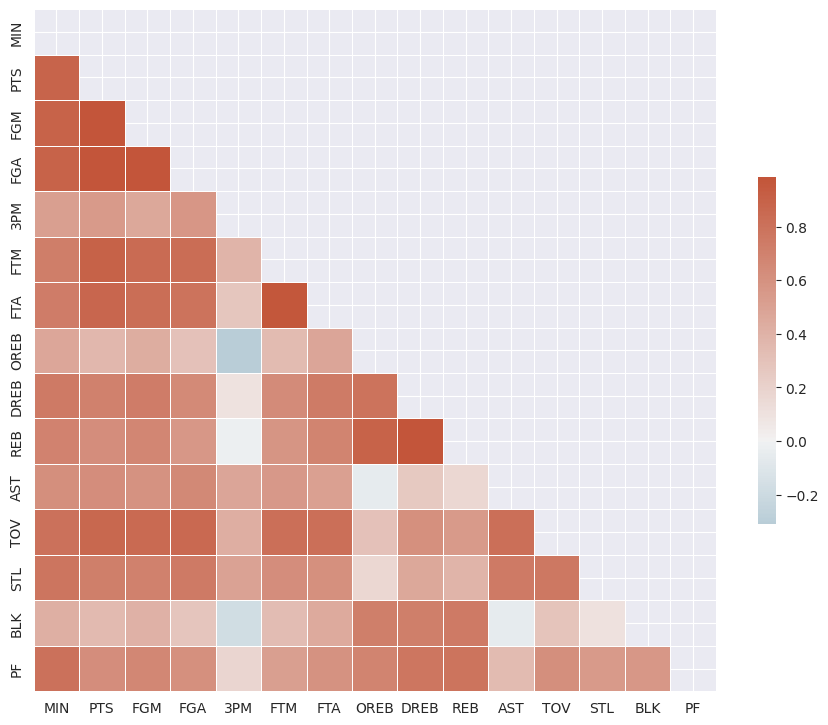

In [16]:
player_stats = nba.drop(columns=["NAME", 'POSITION',"AGE", "GP", 
                                           "AVG_SALARY", "+/-", "FG%", "FT%", "W", "L"])
stats_normalized = (player_stats-player_stats.mean()) / player_stats.std()

corr = stats_normalized.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

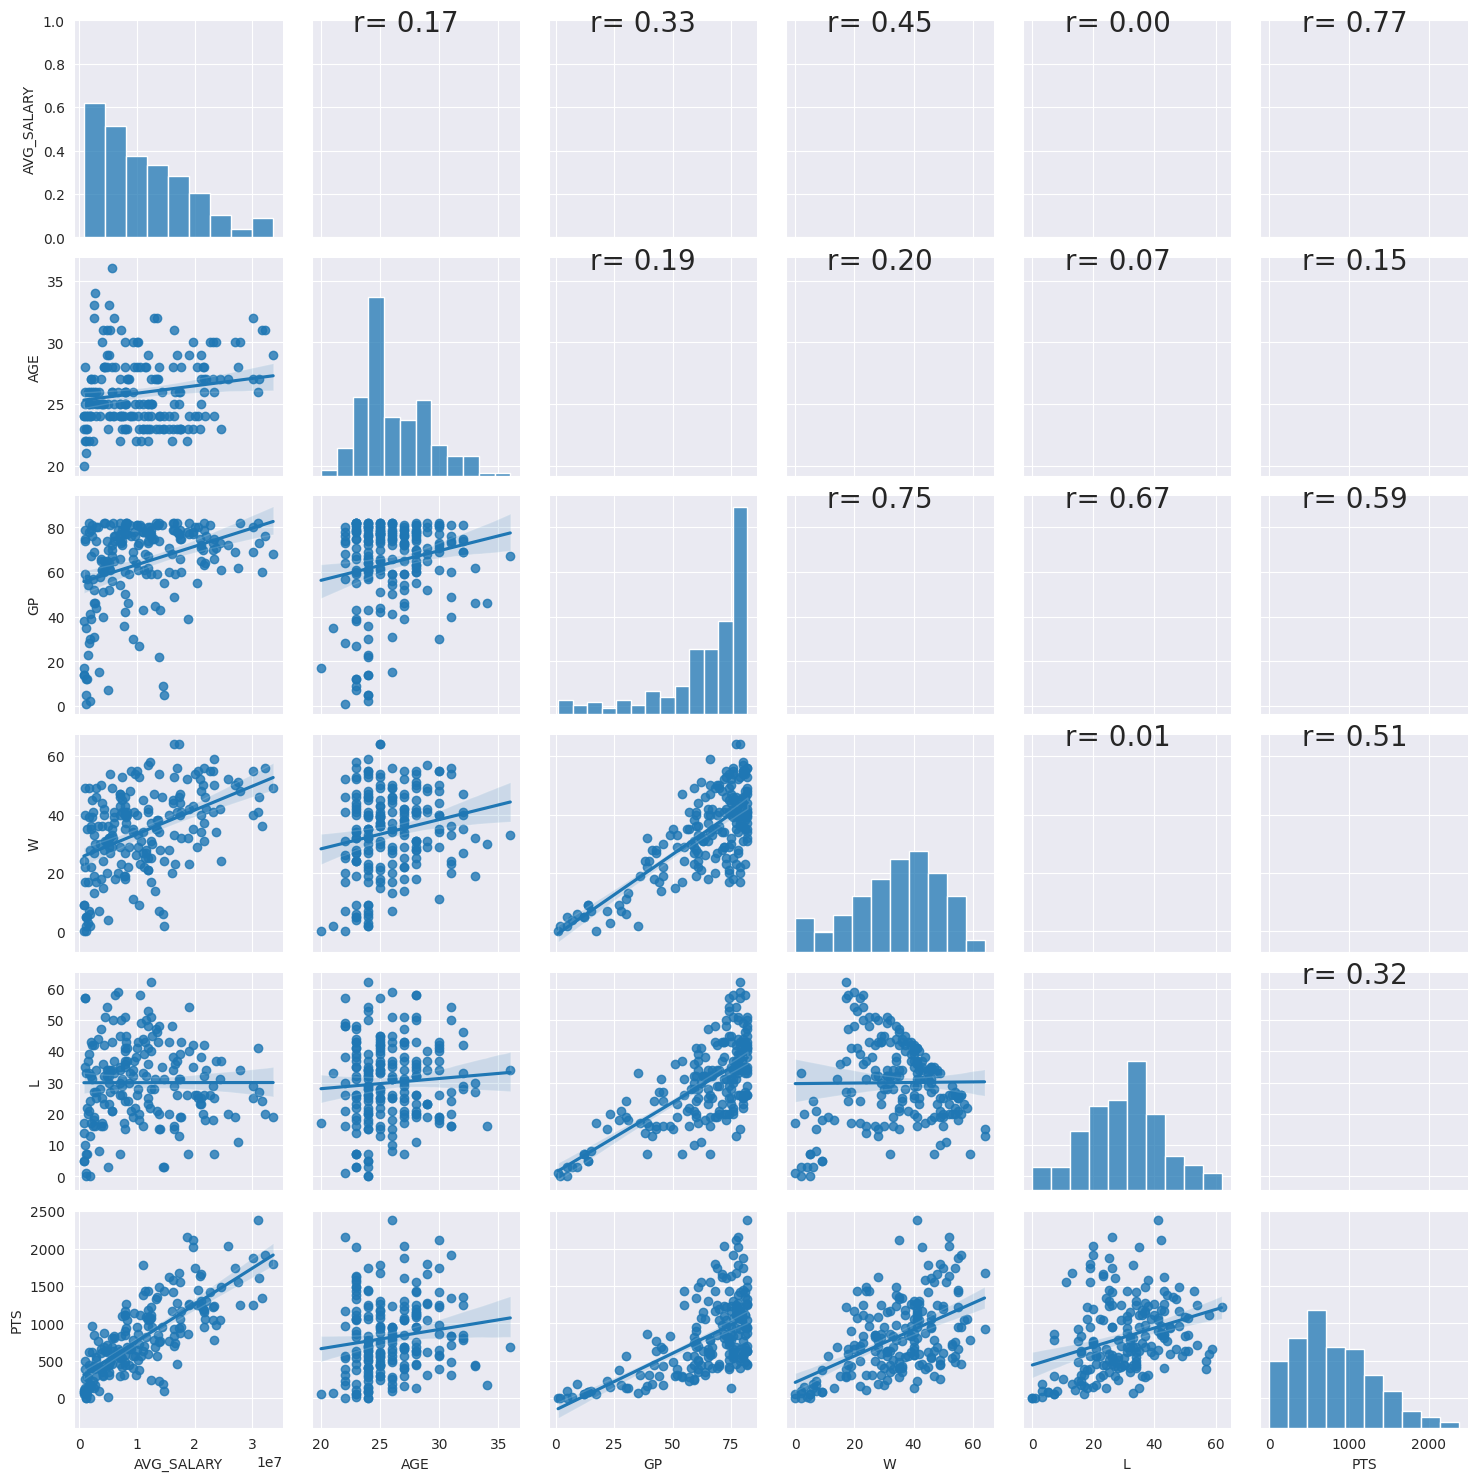

In [19]:

nba_numericas_seleccion = nba_numericas[['AVG_SALARY','AGE','GP','W','L','PTS']]

def corr(x, y, **kwargs):
    # Calculamos el valor de la correlacion
    coef = np.corrcoef(x, y)[0][1]
    # Generamos la etiqueta
    label = f'r= {coef:.2f}' 
    
    # Agregamos la etiqueta al grafico
    ax = plt.gca()
    ax.annotate(label, xy = (0.2, 0.95), size = 20, xycoords = ax.transAxes)
    

# Mapeamos los graficos en las ubicaciones correspondientes
g = sns.PairGrid(nba_numericas_seleccion)
g.map_diag(sns.histplot)
g.map_lower(sns.regplot)
g.map_upper(corr)

In [20]:
nba_lineal = nba.drop(['NAME'], axis = 1)

In [21]:
nba_lineal_numericas = nba_lineal.select_dtypes(include=['float64','int64'])

In [22]:
nba_lineal_cat = nba_lineal.select_dtypes(include=['object'])

In [24]:
nba_lineal_cat['POSITION'].unique()

array(['Guard', 'Forward', 'Center'], dtype=object)

In [25]:
from sklearn.preprocessing import OneHotEncoder

one_hot_encoder = OneHotEncoder(categories=[['Guard', 'Forward', 'Center']], drop='first')


In [29]:
one_hot_encoder.fit(nba_lineal_cat[['POSITION']])

OneHotEncoder(categories=[['Guard', 'Forward', 'Center']], drop='first')

In [30]:
one_hot_encoder.categories_


[array(['Guard', 'Forward', 'Center'], dtype=object)]

In [34]:
matriz_dummies = one_hot_encoder.transform(nba_lineal_cat[['POSITION']]).toarray()
matriz_dummies

array([[0., 0.],
       [1., 0.],
       [0., 1.],
       [0., 0.],
       [0., 1.],
       [0., 0.],
       [1., 0.],
       [0., 1.],
       [0., 0.],
       [0., 1.],
       [0., 0.],
       [1., 0.],
       [0., 1.],
       [0., 0.],
       [0., 1.],
       [0., 0.],
       [1., 0.],
       [0., 1.],
       [0., 0.],
       [0., 1.],
       [0., 0.],
       [1., 0.],
       [0., 1.],
       [0., 0.],
       [0., 1.],
       [0., 0.],
       [1., 0.],
       [0., 1.],
       [0., 0.],
       [0., 1.],
       [0., 0.],
       [1., 0.],
       [0., 1.],
       [0., 0.],
       [0., 1.],
       [0., 0.],
       [1., 0.],
       [0., 1.],
       [0., 0.],
       [0., 1.],
       [0., 0.],
       [1., 0.],
       [0., 1.],
       [0., 0.],
       [0., 1.],
       [0., 0.],
       [1., 0.],
       [0., 1.],
       [0., 0.],
       [0., 1.],
       [0., 0.],
       [1., 0.],
       [0., 1.],
       [0., 0.],
       [0., 1.],
       [0., 0.],
       [1., 0.],
       [0., 1.],
       [0., 0.

In [35]:
nombres_dummies = one_hot_encoder.get_feature_names_out(['POSITION'])
nombres_dummies

array(['POSITION_Forward', 'POSITION_Center'], dtype=object)

In [98]:
df_dummies = pd.DataFrame(matriz_dummies, columns=nombres_dummies, index=nba_lineal_cat.index)
df_dummies.head()

,POSITION_Forward,POSITION_Center
0,0.0,0.0
1,1.0,0.0
2,0.0,1.0
3,0.0,0.0
4,0.0,1.0


In [99]:
nba_lineal = pd.concat([nba_lineal_numericas, df_dummies],axis=1)
X = nba_lineal.drop(['AVG_SALARY'], axis = 1)
reg_features = X.columns
y = nba_lineal['AVG_SALARY']


In [100]:
import statsmodels.api as sm
from statsmodels.api import add_constant

In [101]:
X = sm.add_constant(X)
model = sm.OLS(y,X)
results = model.fit()

In [102]:
print(f"ECM: {results.mse_resid}")


ECM: 17527457015656.84


In [103]:
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:             AVG_SALARY   R-squared:                       0.749
Model:                            OLS   Adj. R-squared:                  0.719
Method:                 Least Squares   F-statistic:                     25.13
Date:                Thu, 01 Aug 2024   Prob (F-statistic):           2.52e-42
Time:                        20:54:32   Log-Likelihood:                -3304.9
No. Observations:                 199   AIC:                             6654.
Df Residuals:                     177   BIC:                             6726.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             8.808e+05   4.01e+06  

In [104]:
def coef_summary(results):
    coef_df=pd.DataFrame(results.summary().tables[1].data)
    coef_df.columns=coef_df.iloc[0]
    coef_df=coef_df.drop(0)
    coef_df=coef_df.set_index(coef_df.columns[0])
    coef_df=coef_df.astype(float)
    errors=coef_df['coef']-coef_df['[0.025']
    coef_df['errors']=errors
    coef_df=coef_df.drop(['const'])
    coef_df=coef_df.sort_values(by=['coef'])
    
    variables=list(coef_df.index.values)
    coef_df['variables']=variables
    return coef_df

In [105]:
coef_df=coef_summary(results)

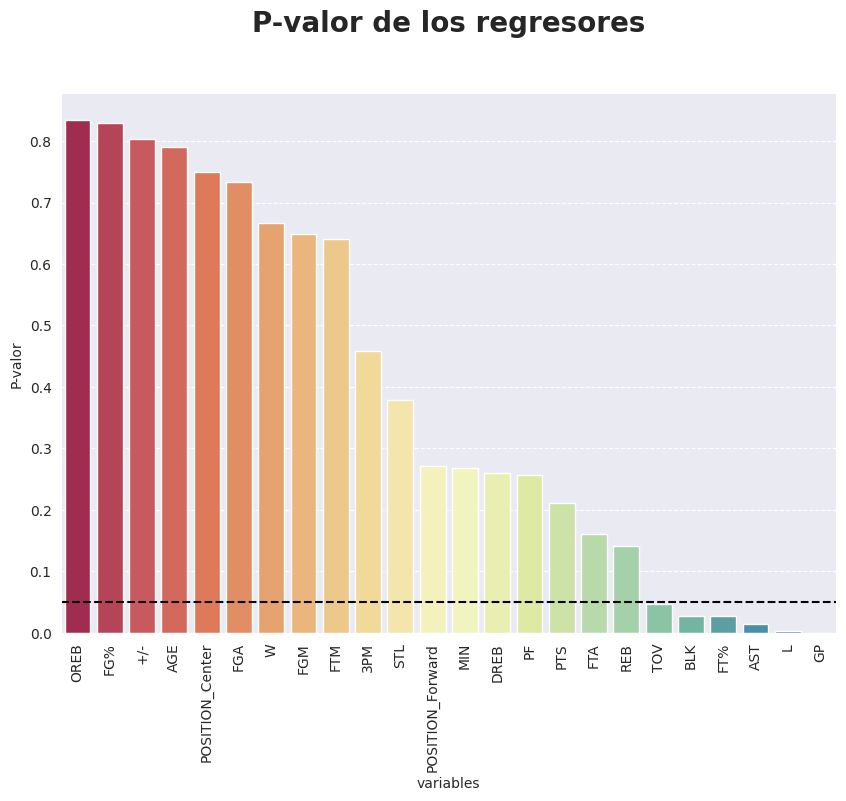

In [106]:
fig,ax=plt.subplots(figsize=(10,7))
coef_df=coef_df.sort_values(by='P>|t|', ascending=False)
ax=sns.barplot(x='variables', y='P>|t|', data=coef_df, palette="Spectral")
ax.set_title('P-valor de los regresores', fontweight='bold', fontsize=20, y=1.1)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.grid(axis='y', linestyle='--')
ax.set_ylabel('P-valor', fontsize=10)
ax.set_xlabel('variables', fontsize=10)
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)
ax.axhline(y=0.05, color='black', linestyle='--')
plt.show()

In [107]:
from sklearn.preprocessing import StandardScaler

In [108]:
scaler=StandardScaler()


In [109]:
nba_lineal=nba.drop(['NAME'], axis = 1)
nba_lineal_numerica=nba_lineal.select_dtypes(include=['float64','int64'])
nba_lineal_numerica=nba_lineal_numerica.drop(['AVG_SALARY'], axis = 1)
nba_lineal_numerica_column=nba_lineal_numerica.columns

In [110]:
scaled=scaler.fit_transform(nba_lineal_numerica)

In [111]:
nba_lineal_numerica=pd.DataFrame(scaled, columns=nba_lineal_numerica_column)


In [112]:
nba_lineal_cat=nba_lineal.select_dtypes(include=['object'])
nba_lineal_cat=pd.get_dummies(nba_lineal_cat)

In [121]:
nba_lineal=pd.concat([nba_lineal_numerica, df_dummies],axis=1)
X=nba_lineal.copy()
Y=nba['AVG_SALARY']

In [122]:
#construimos el modelo agregando las constantes
X=sm.add_constant(X)
model_scaled=sm.OLS(Y,X)
results_scaled=model_scaled.fit()

In [124]:
print(f'ECM : {results_scaled.mse_resid}')

ECM : 17527457015656.836


In [125]:
print(results_scaled.summary())

                            OLS Regression Results                            
Dep. Variable:             AVG_SALARY   R-squared:                       0.749
Model:                            OLS   Adj. R-squared:                  0.719
Method:                 Least Squares   F-statistic:                     25.13
Date:                Thu, 01 Aug 2024   Prob (F-statistic):           2.52e-42
Time:                        20:56:41   Log-Likelihood:                -3304.9
No. Observations:                 199   AIC:                             6654.
Df Residuals:                     177   BIC:                             6726.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             1.098e+07   4.86e+05  

In [126]:
coef_df_scaled=coef_summary(results_scaled)

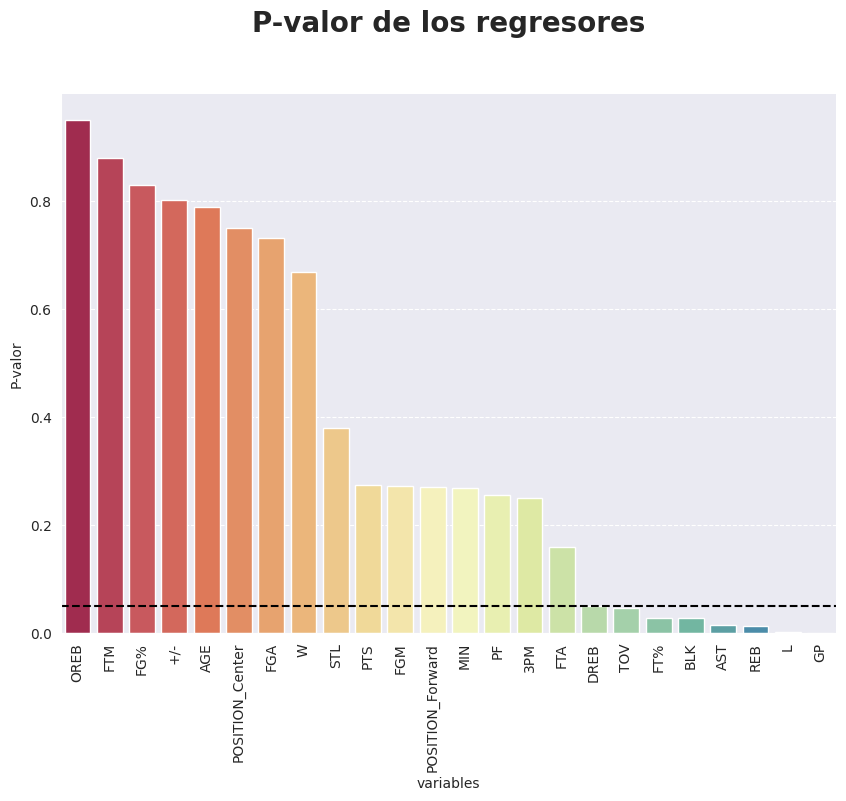

In [128]:
fig,ax=plt.subplots(figsize=(10,7))
coef_df_scaled=coef_df_scaled.sort_values(by='P>|t|', ascending=False)
ax=sns.barplot(x='variables', y='P>|t|', data=coef_df_scaled, palette="Spectral")
ax.set_title('P-valor de los regresores', fontweight='bold', fontsize=20, y=1.1)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.grid(axis='y', linestyle='--')
ax.set_ylabel('P-valor', fontsize=10)
ax.set_xlabel('variables', fontsize=10)
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)
ax.axhline(y=0.05, color='black', linestyle='--')
plt.show()

In [152]:
print(f"MSE scaled:{results_scaled.rsquared} vs MSE {results.rsquared}" )
print(f"ADJ MSE scaled:{results_scaled.rsquared_adj} vs ADJ MSE {results.rsquared_adj}" )
print(f"p-value scaled:{results_scaled.f_pvalue} vs p-value {results.f_pvalue}" )

MSE scaled:0.7488040918607881 vs MSE 0.7488040918607881
ADJ MSE scaled:0.7190011875052884 vs ADJ MSE 0.7190011875052884
p-value scaled:2.517282250647345e-42 vs p-value 2.5172822506473962e-42


**Regularizacion** 

**Particion Train Test**

In [153]:
from sklearn.model_selection import train_test_split

In [154]:
nba_reg=nba.drop(['NAME'], axis = 1)
nba_reg_numericas=nba_reg.select_dtypes(include=['float64','int64'])
nba_reg_columns_columns=nba_reg_numericas.columns

In [160]:
nba_reg_object=df_dummies.copy()
nba_reg=pd.concat([nba_reg_numericas, nba_reg_object], axis=1)

x=nba_reg.drop(['AVG_SALARY'], axis = 1)
y=nba_reg['AVG_SALARY']

In [196]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Verificar las formas después de la división
print(f'x_train shape: {x_train.shape}')  # Debería ser (160, 24) si test_size es 0.2
print(f'y_train shape: {y_train.shape}')  # Debería ser (160,)

# Asegurarse de que las dimensiones coincidan
if x_train.shape[0] != y_train.shape[0]:
    raise ValueError(f'Desajuste en el número de muestras: x_train tiene {x_train.shape[0]} muestras, y_train tiene {y_train.shape[0]} muestras')


x_train shape: (139, 24)
y_train shape: (139,)


**function Lasso** 

In [197]:
from sklearn.linear_model import Lasso

In [198]:
n_alphas=50
alphas=np.logspace(-5,7.2,n_alphas)

In [199]:
coefs=[]
for a in alphas:
    lasso=Lasso(alpha=a, fit_intercept=False)
    lasso.fit(x_train,y_train)
    coefs.append(lasso.coef_)

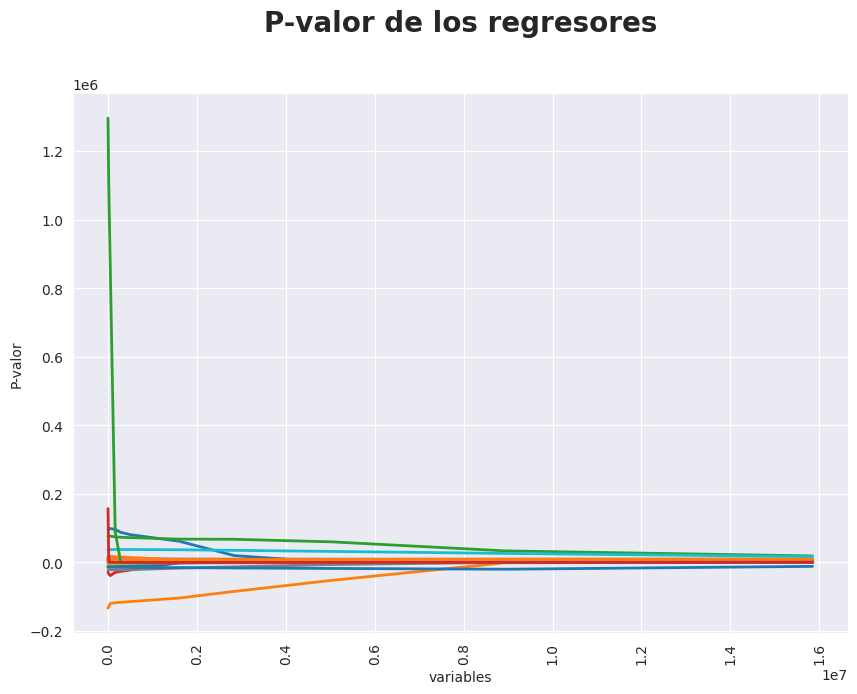

In [200]:
fig,ax=plt.subplots(figsize=(10,7))
l1=plt.plot(alphas,coefs, linewidth=2)
ax.set_title('P-valor de los regresores', fontweight='bold', fontsize=20, y=1.1)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.set_ylabel('P-valor', fontsize=10)
ax.set_xlabel('variables', fontsize=10)
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)
plt.show()

nos quedamos con las variables que sobreviven al proceso de selcciion

In [201]:
coeficientes=pd.DataFrame(coefs, columns=x_train.columns)
variables_importantes=coeficientes.loc[:,x_train.columns[coeficientes.loc[45:].any().values]]

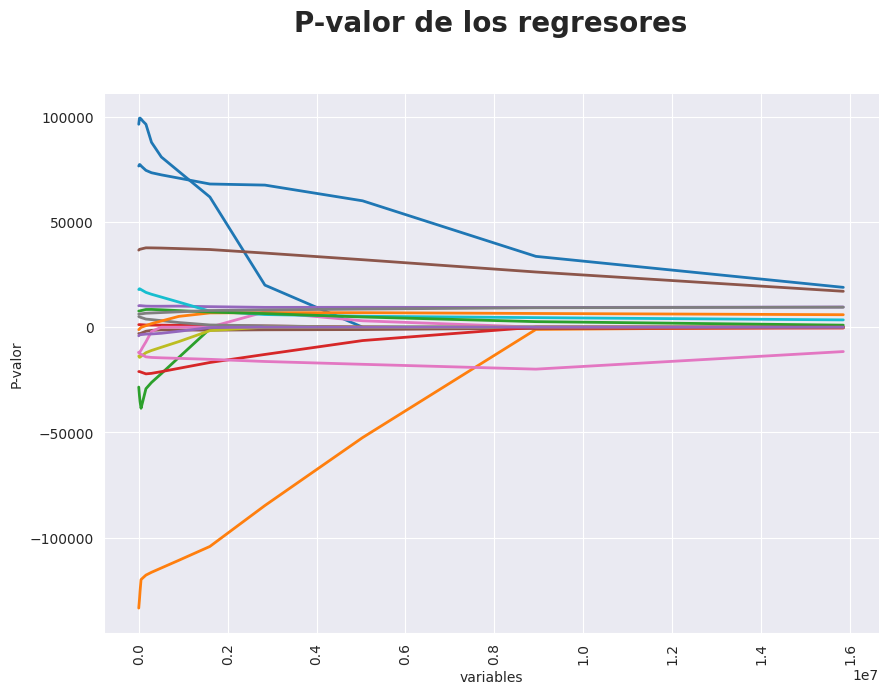

In [202]:
fig,ax=plt.subplots(figsize=(10,7))
l1=plt.plot(alphas,variables_importantes, linewidth=2)
ax.set_title('P-valor de los regresores', fontweight='bold', fontsize=20, y=1.1)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.set_ylabel('P-valor', fontsize=10)
ax.set_xlabel('variables', fontsize=10)
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)
plt.show()